## General understanding of data

In [2]:
import pandas as pd

df = pd.read_csv('airlines_flights_data.csv')

print(df.head())
print()
print(df.sample())
print()
print(f"The shape is {df.shape}")
print()
print(df.describe())
print()
print(df.isnull().sum())

   index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  

         index  airline  flight source_city departure_time stops arrival_time  \
193450  193450  Vistara  UK-832     Chennai  Early_Morning   one        Night   

       destin

## Define Features and Targets

In [4]:

column_names = df.columns.tolist()
print(column_names)


feature_column_names = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']
target_column_names = ['price']

for feature_column_name in feature_column_names:
    print(df[feature_column_name].value_counts())
    print()


['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

arrival_time
Night            91538
E

## Data distribution

### Feature Distribution in Histograms

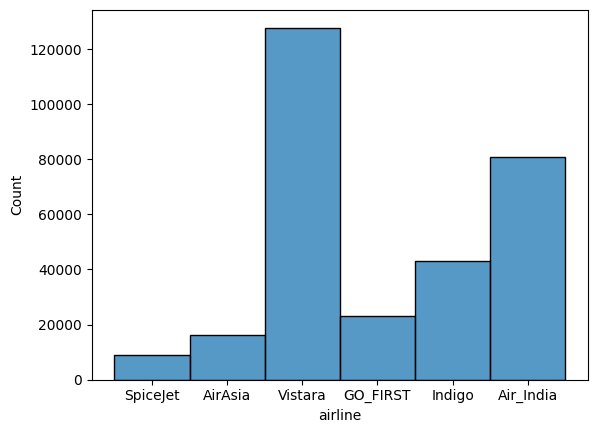

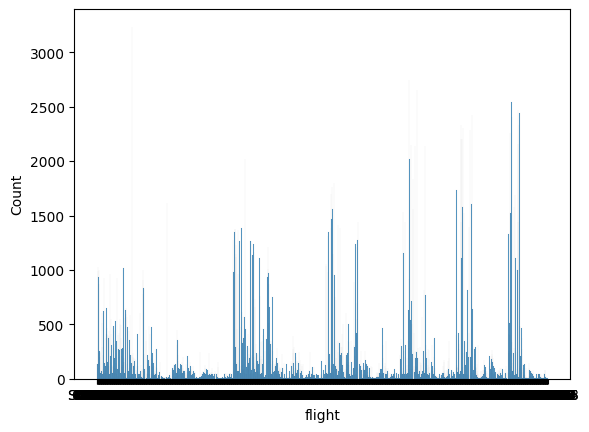

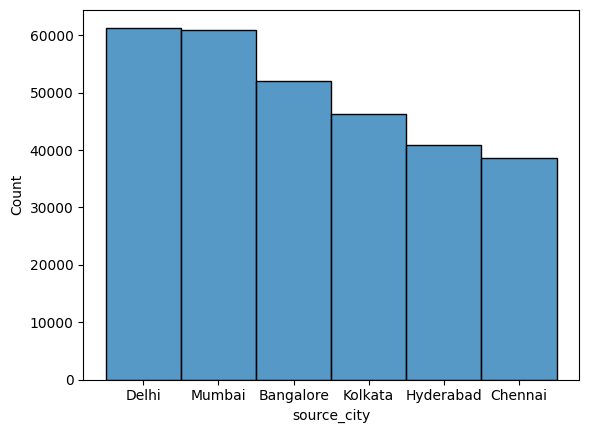

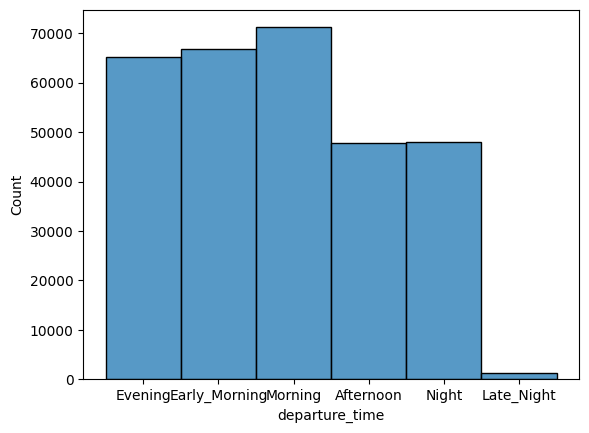

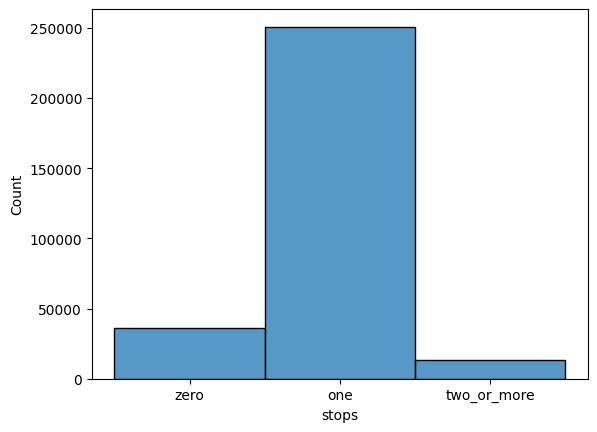

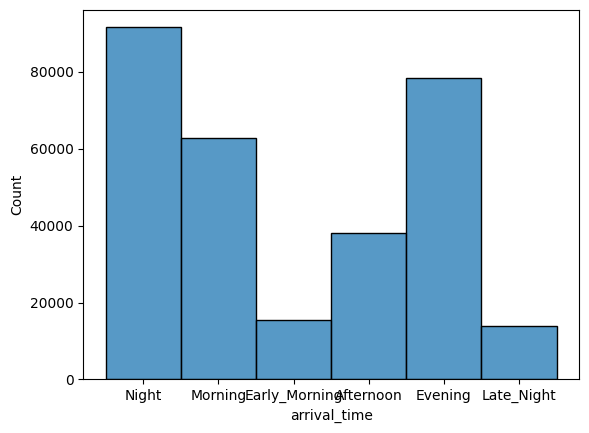

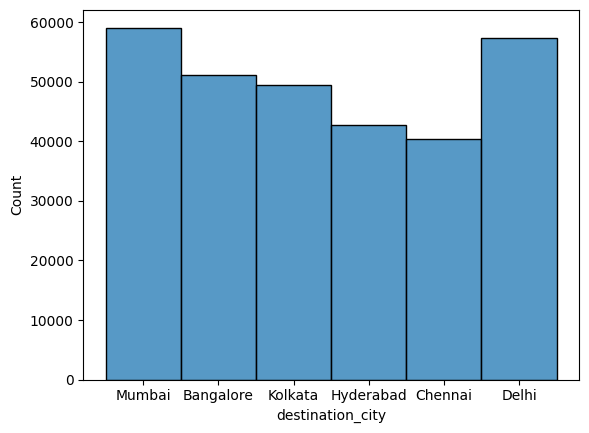

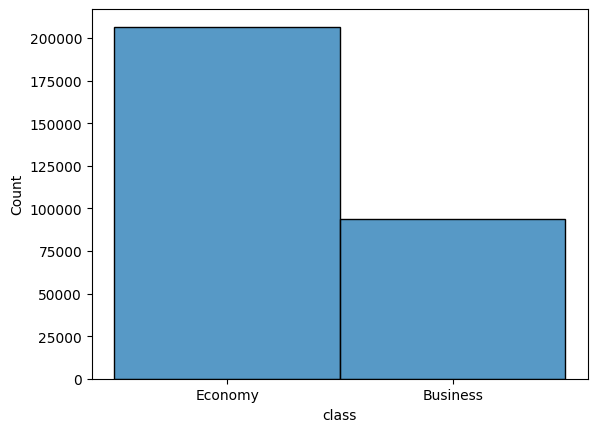

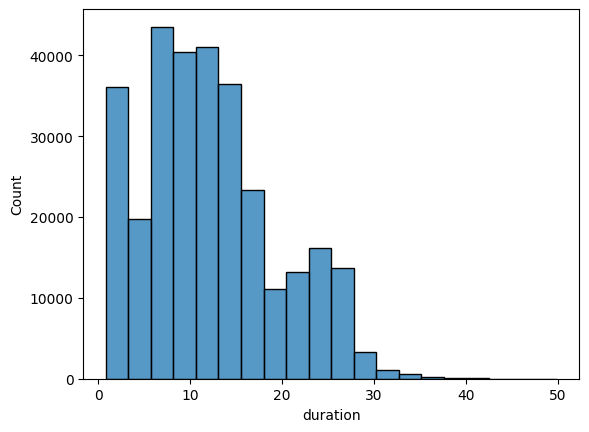

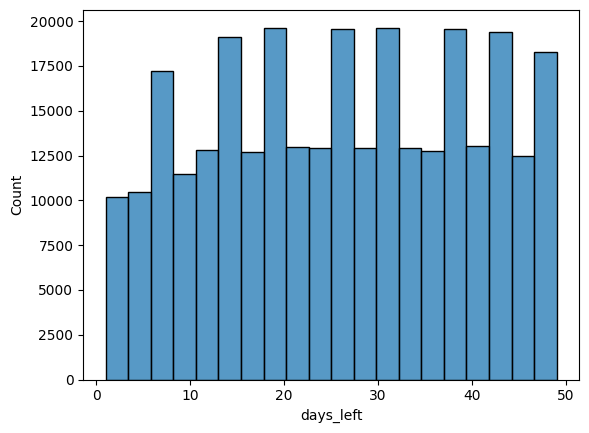

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt



for feature in feature_column_names:
    sns.histplot(df[feature],
            bins=20
            )
    plt.show()





### Feature Distribution in Box Plots

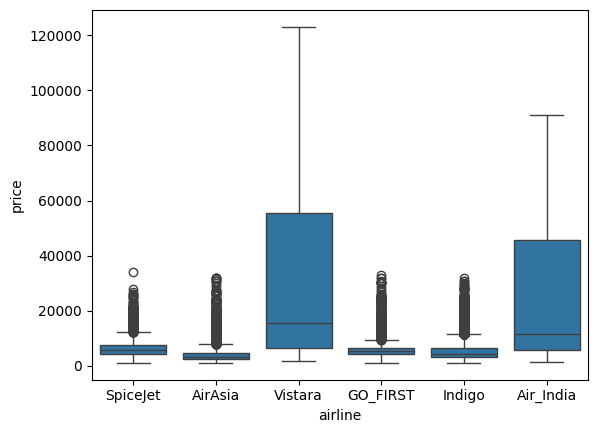

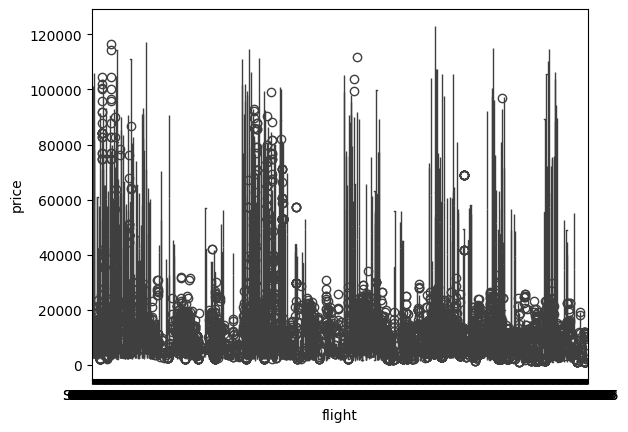

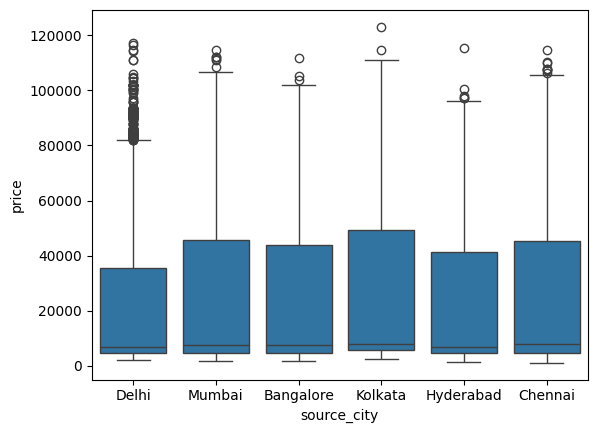

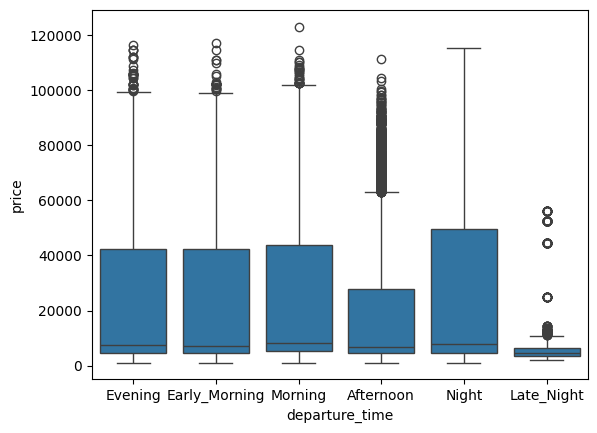

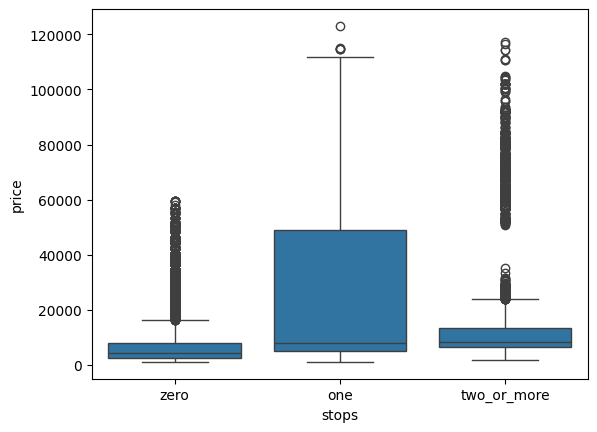

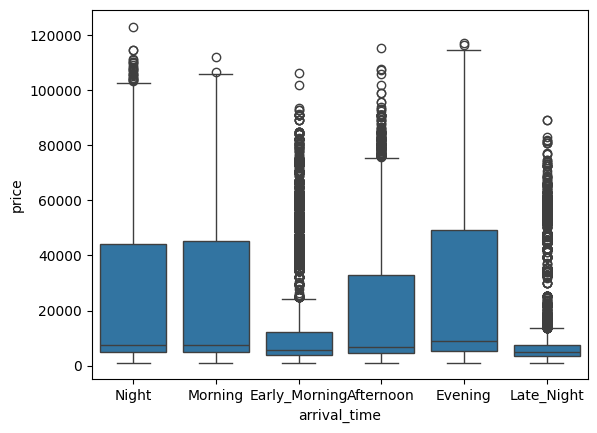

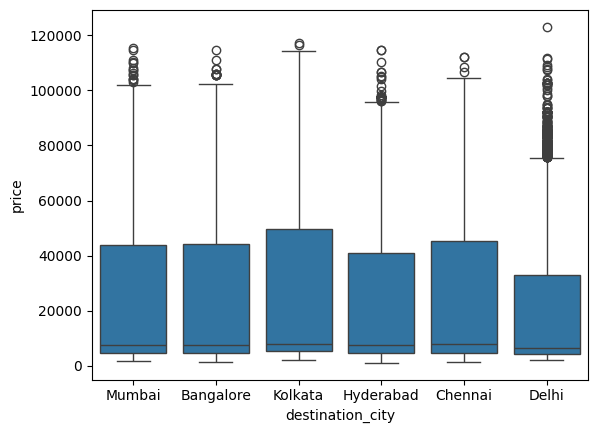

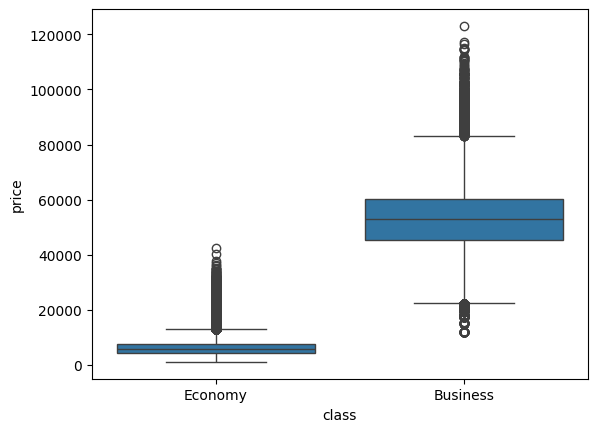

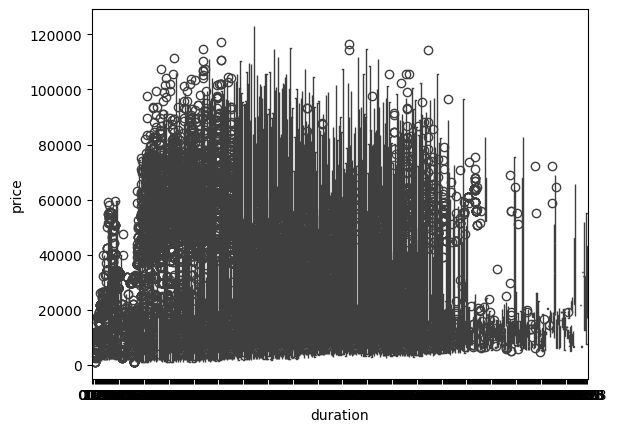

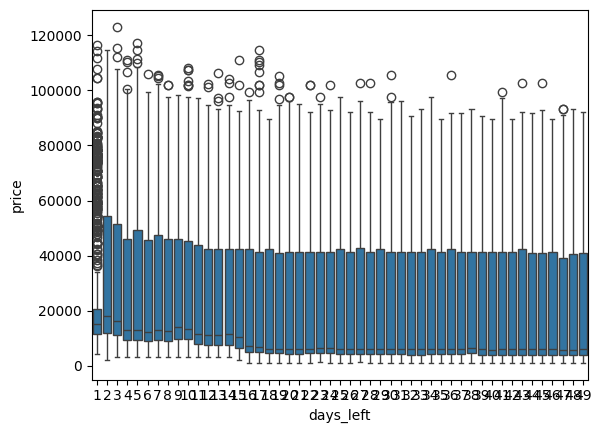

In [ ]:
# Note that this is different than fruit: The target is continuous, and the feature is classes
for feature in feature_column_names:
    sns.boxplot(x=feature,
                y='price',
                data=df
            )
    plt.show()

### Violin plot

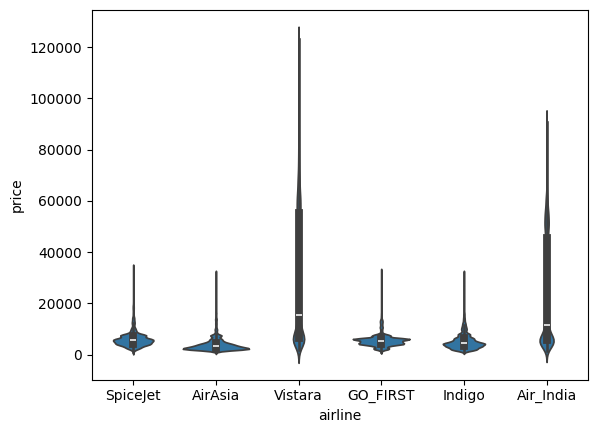

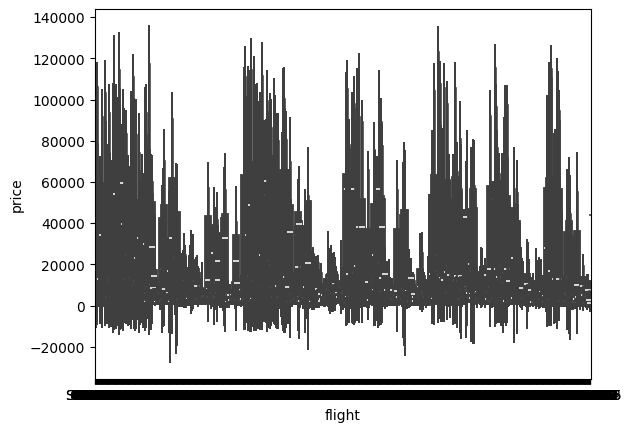

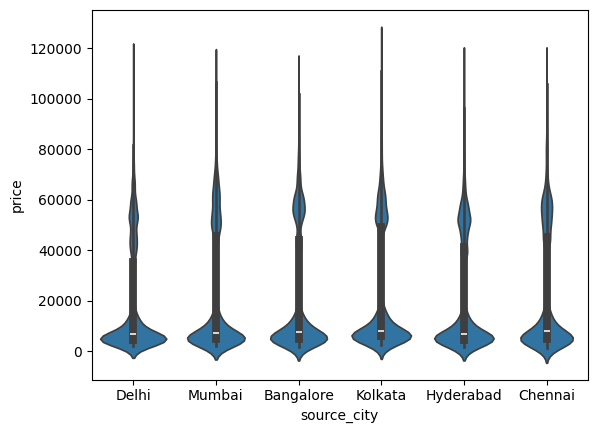

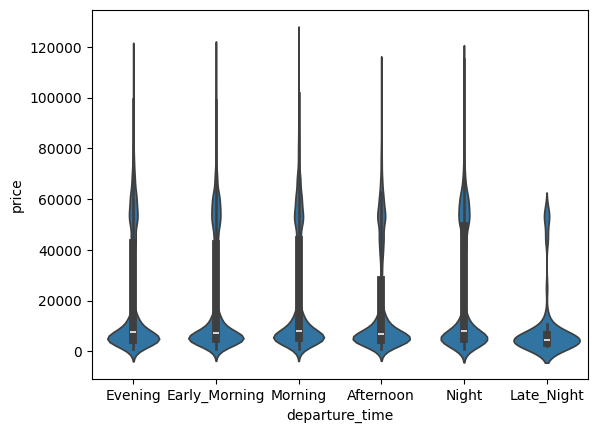

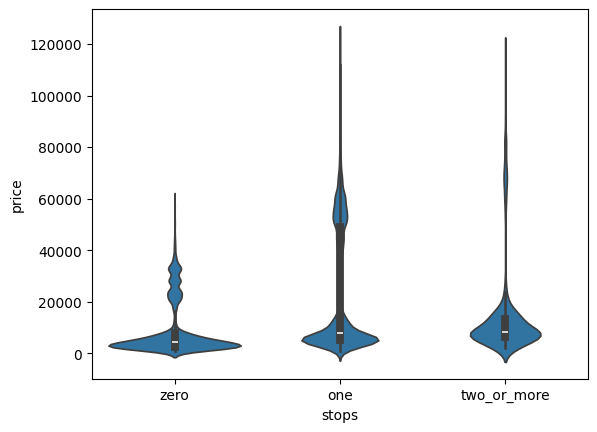

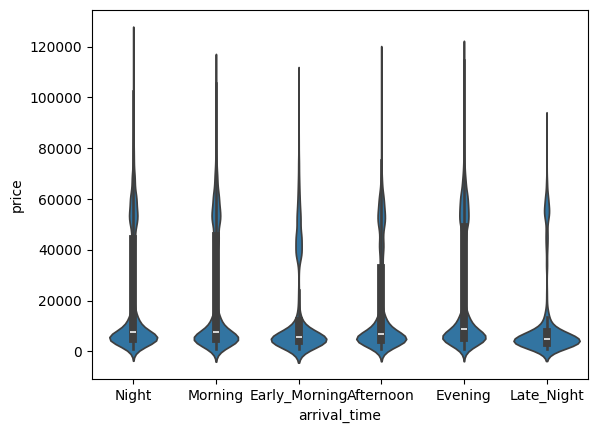

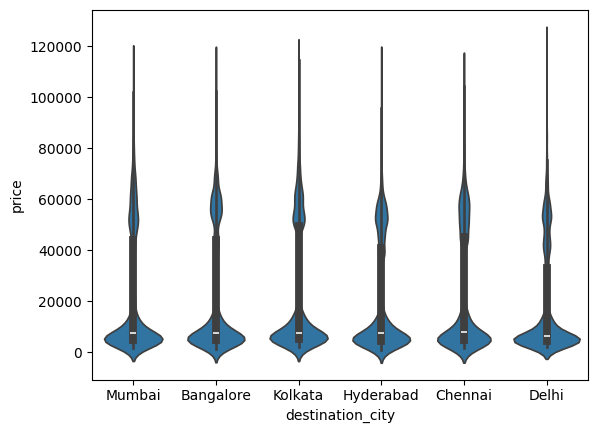

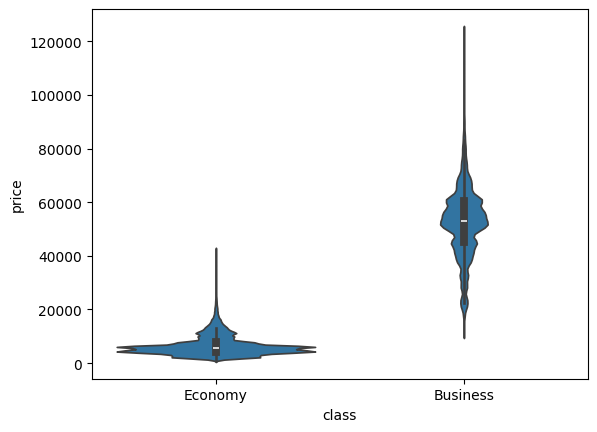

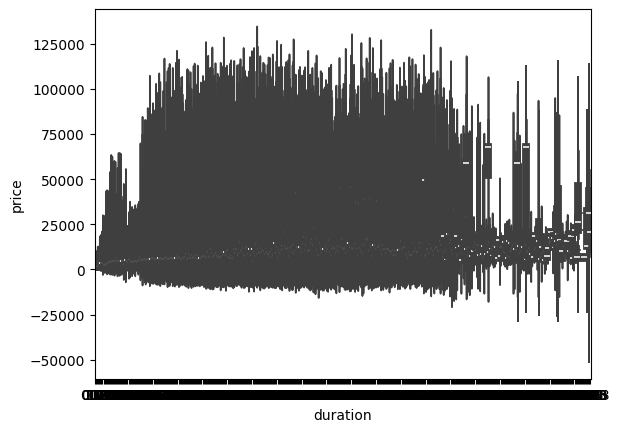

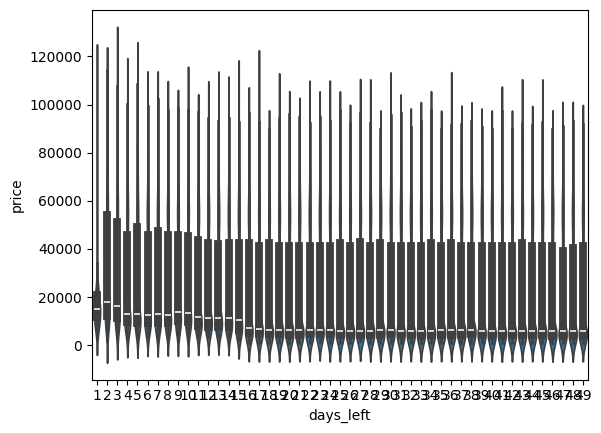

In [8]:
# Note that this is different than fruit: The target is continuous, and the feature is classes
for feature in feature_column_names:
    sns.violinplot(x=feature,
                y='price',
                data=df
            )
    plt.show()

## Feature Relationship Analysis or Correlation Analysis

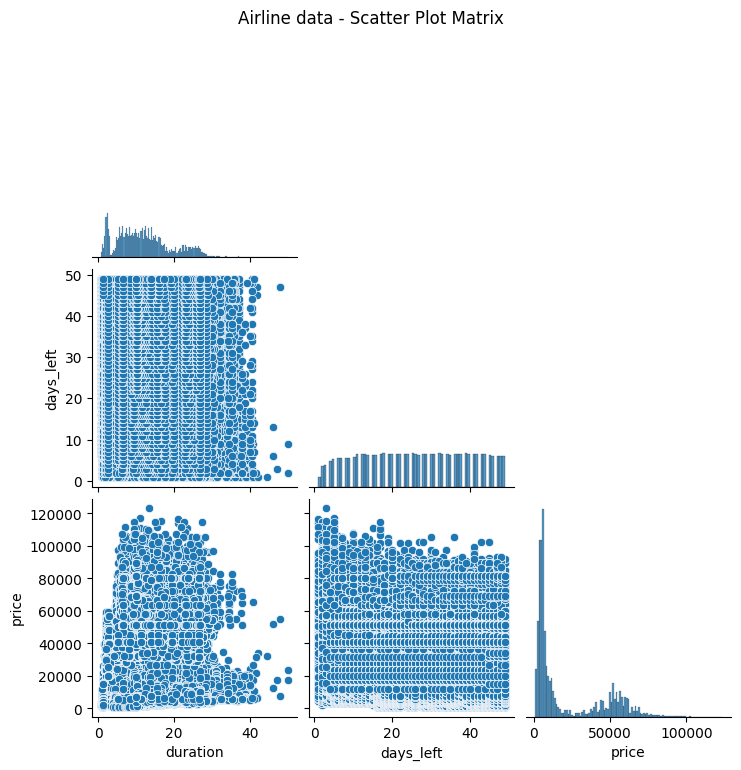

In [9]:

# drop the two target columns that we don't need for the pairplot 
# (we need only 1 target column for the color)
df_pairplot = df.drop(columns=['index'])

sns.pairplot(df_pairplot, 
             corner=True
             )
plt.suptitle("Airline data - Scatter Plot Matrix", y=1.02)
plt.show()

### Feature Correlation Matrix

                 mass     width    height  color_score
mass         1.000000  0.877687  0.609571    -0.079794
width        0.877687  1.000000  0.396848    -0.076576
height       0.609571  0.396848  1.000000    -0.247047
color_score -0.079794 -0.076576 -0.247047     1.000000


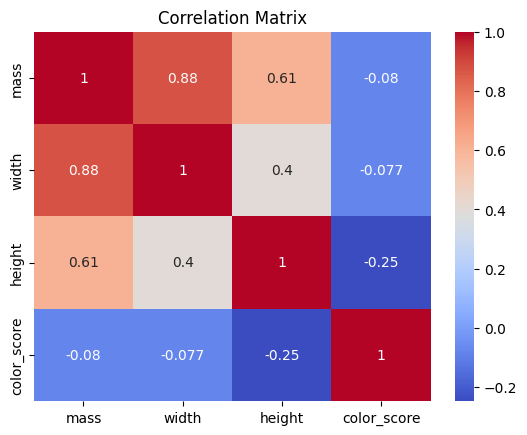

In [42]:
df_feature_columns = df[features]

corr = df_feature_columns.corr() # correlation

print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()